In [1]:
import sys
sys.path.append("../")

In [2]:
from network_model import *
from pymarkowitz import *


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [27]:
GAMBLES = generate_gambles(10, prob_left=0.4, gain_right_bound=1.8)
GAMBLES.append({"outcomes":[1.1, 0.0], "probs":[1.0, 0.0]})

In [28]:
gamble_averages  = np.zeros((len(GAMBLES)))
gamble_variances = np.zeros((len(GAMBLES)))

# compute expected value and variance of each gamble
for i,g in enumerate(GAMBLES):
    gamble_averages[i]  = np.average(g["outcomes"], weights=g["probs"])
    gamble_variances[i] = np.average((g["outcomes"]-gamble_averages[i])**2, weights=g["probs"])

In [29]:
S = 1000
GAMBLE_PRIOR_SAMPLES = np.zeros((S, len(GAMBLES)))
for i,g in enumerate(GAMBLES):
    GAMBLE_PRIOR_SAMPLES[:,i] = np.random.choice(g["outcomes"], S, p=g["probs"])

In [30]:
GAMBLES_MU  = np.mean(GAMBLE_PRIOR_SAMPLES-1, axis=0)
GAMBLES_COV = np.cov(GAMBLE_PRIOR_SAMPLES-1, rowvar=False)

In [31]:
PortOpt = Optimizer(GAMBLES_MU, GAMBLES_COV)
PortOpt.add_objective("max_sharpe", risk_free=0.1)
PortOpt.add_constraint("weight", weight_bound=(0,1), leverage=1)

PortOpt.solve()
PortOpt.weight_sols

array([0.10549914, 0.12177991, 0.05772511, 0.09797966, 0.06992168,
       0.07721338, 0.11991339, 0.13341429, 0.0569552 , 0.14079911,
       0.01879914])

### Risk-aversion experiments

2.8433201973432354e-17
5.618877758906127e-17
2.1103642746190717e-17
9.983388631454267e-18
0.0011057566505037679


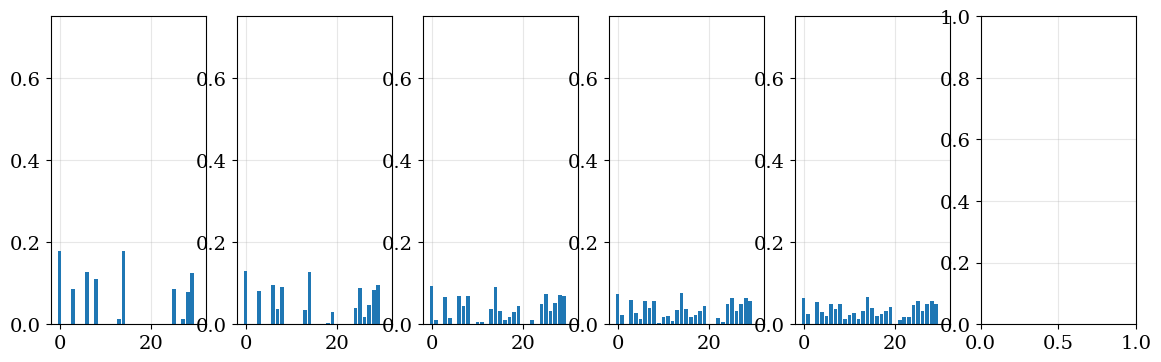

In [426]:
fig, axs = plt.subplots(1, 6, figsize=(14,4))


for i,aversion in enumerate([5, 10, 20, 30, 40]):
    PortOpt = Optimizer(GAMBLES_MU, GAMBLES_COV)
    PortOpt.add_objective("efficient_frontier", aversion=aversion)
    PortOpt.add_constraint("weight", weight_bound=(0,1), leverage=1)

    PortOpt.solve()
    axs[i].bar(np.arange(len(GAMBLES)), PortOpt.weight_sols)
    print(PortOpt.weight_sols[-1])
    axs[i].set_ylim(0, 0.75)

plt.show()